<a href="https://colab.research.google.com/github/themiya-420/HumanActionDetection/blob/main/Heart_Disseas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the Dataset**

In [2]:
ls

processed.cleveland.data  sample_data/


In [3]:
df = pd.read_csv('processed.cleveland.data', header=None, na_values='?')

In [4]:
# Add column names based on UCI documentation
df.columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'ca', 'thal', 'target'
]

# Preview the first few rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# **Descriptive Analysis**

In [5]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [6]:
# Summary statistics
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [7]:
# Check for missing values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


# **Exploratory Data Analysis**

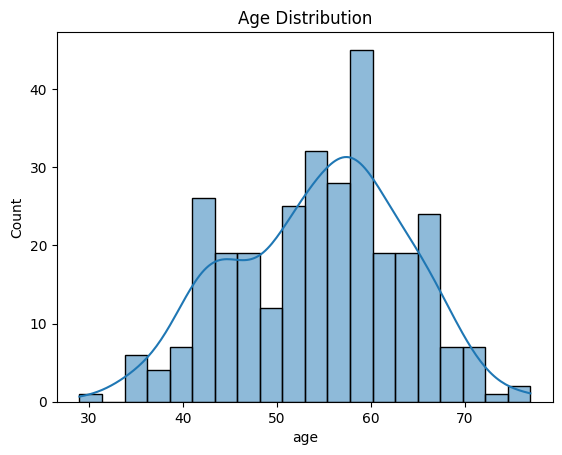

In [8]:
# Age distribution
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

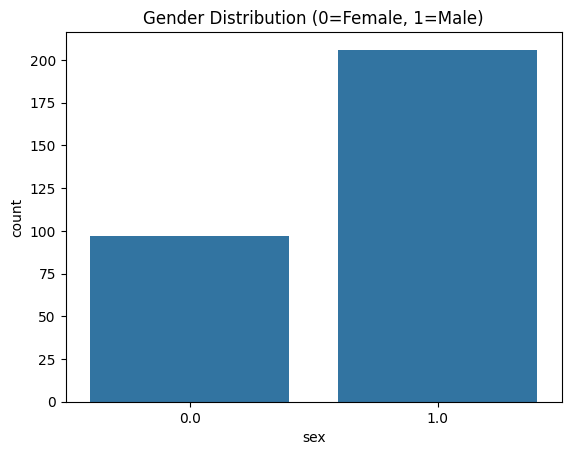

In [9]:
# Gender distribution
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution (0=Female, 1=Male)')
plt.show()

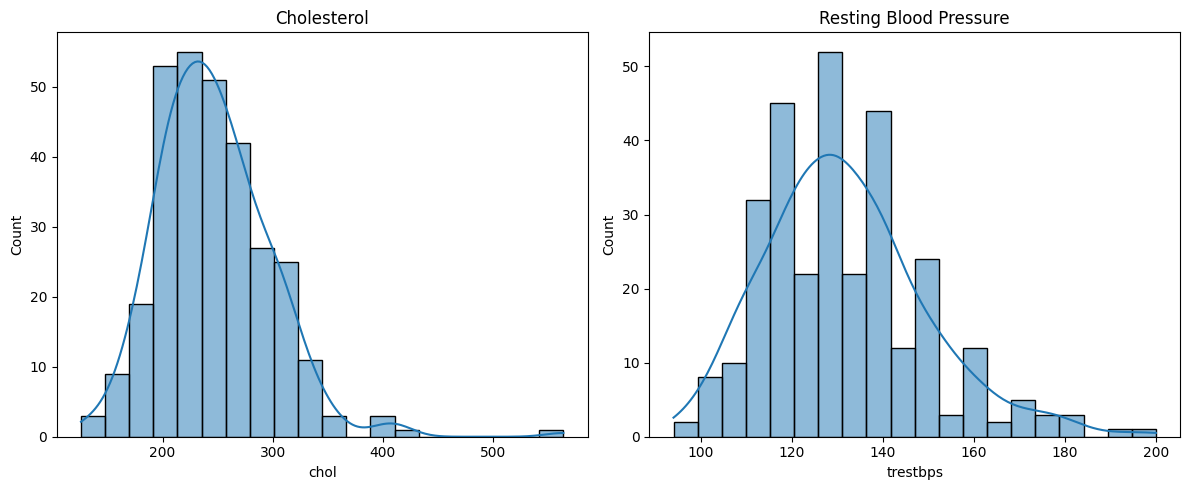

In [10]:
# Cholesterol and Blood Pressure
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['chol'], bins=20, kde=True, ax=axs[0])
axs[0].set_title('Cholesterol')
sns.histplot(df['trestbps'], bins=20, kde=True, ax=axs[1])
axs[1].set_title('Resting Blood Pressure')
plt.tight_layout()
plt.show()

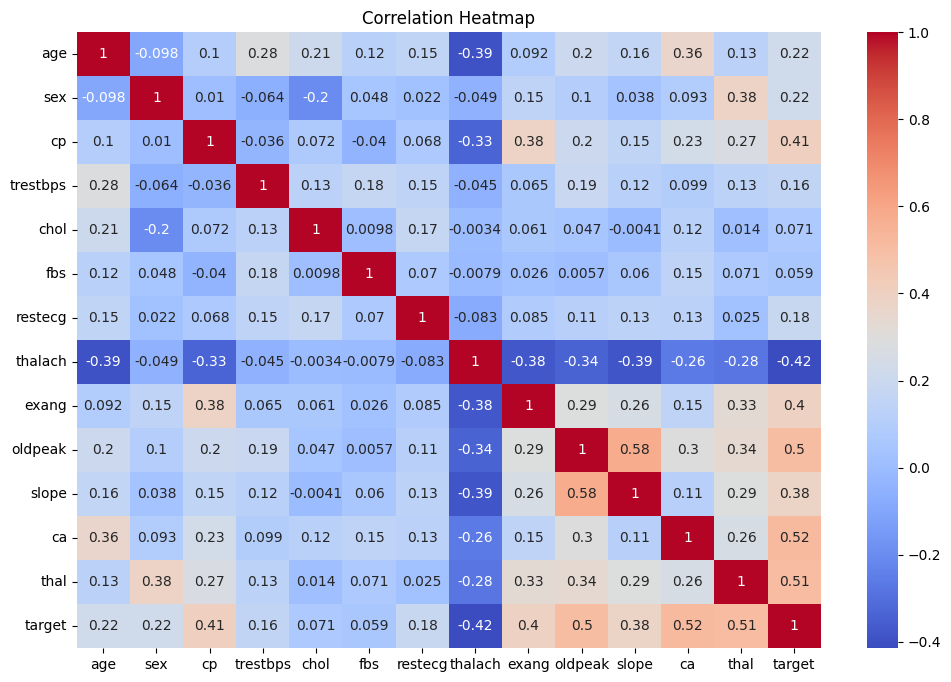

In [11]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# **Handle Missing Values & Outliers**

In [12]:
# Convert problematic columns to numeric
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

In [13]:
# Impute missing values
df['ca'].fillna(df['ca'].median(), inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

/tmp/ipython-input-13-1661782970.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ca'].fillna(df['ca'].median(), inplace=True)
/tmp/ipython-input-13-1661782970.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

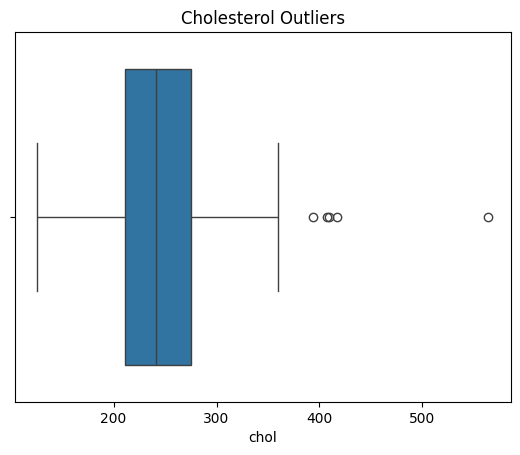

In [15]:
# Check outliers visually (optional)
sns.boxplot(x=df['chol'])
plt.title('Cholesterol Outliers')
plt.show()

# **Feature Scaling & Encoding**

In [16]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical columns
scaler = StandardScaler()
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(
    df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
)

# Convert categorical columns to integers (if needed)
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df[categorical_cols] = df[categorical_cols].astype(int)

# Convert target to binary
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# **Test Train Split**

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Importing Libraries for Model Training**

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# **Initialize and Train Models**

In [19]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Decision Tree
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

# **Evaluate Models**

In [20]:
models = {
    'Logistic Regression': log_model,
    'Decision Tree': tree_model,
    'Random Forest': rf_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


=== Logistic Regression ===
Accuracy: 0.8852459016393442
Precision: 0.8787878787878788
Recall: 0.90625
F1 Score: 0.8923076923076924

Confusion Matrix:
 [[25  4]
 [ 3 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61


=== Decision Tree ===
Accuracy: 0.7213114754098361
Precision: 0.8
Recall: 0.625
F1 Score: 0.7017543859649122

Confusion Matrix:
 [[24  5]
 [12 20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.83      0.74        29
           1       0.80      0.62      0.70        32

    accuracy                           0.72        61
   macro avg       0.73      0.73      0.72        61
weighted avg       0.74      0

# **Grpahical Evaluation of Models**

<Figure size 1200x600 with 0 Axes>

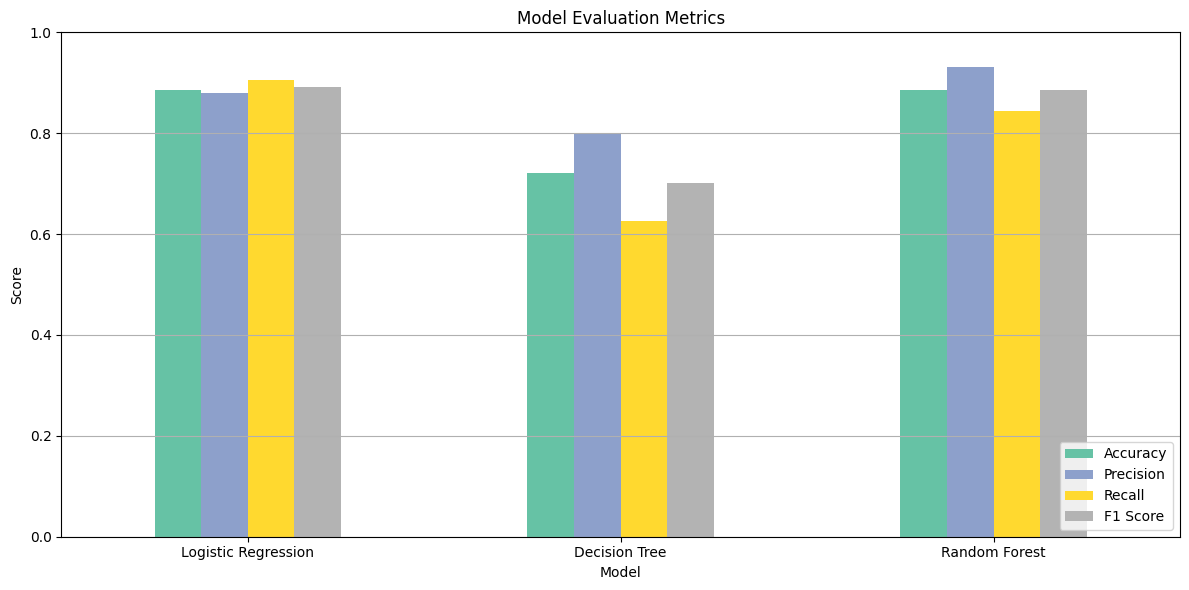

In [21]:
# Collect scores for all models
scores = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for name, model in models.items():
    y_pred = model.predict(X_test)
    scores['Model'].append(name)
    scores['Accuracy'].append(accuracy_score(y_test, y_pred))
    scores['Precision'].append(precision_score(y_test, y_pred))
    scores['Recall'].append(recall_score(y_test, y_pred))
    scores['F1 Score'].append(f1_score(y_test, y_pred))

# Convert to DataFrame
score_df = pd.DataFrame(scores)

# Plot bar charts
plt.figure(figsize=(12, 6))
score_df.set_index('Model').plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


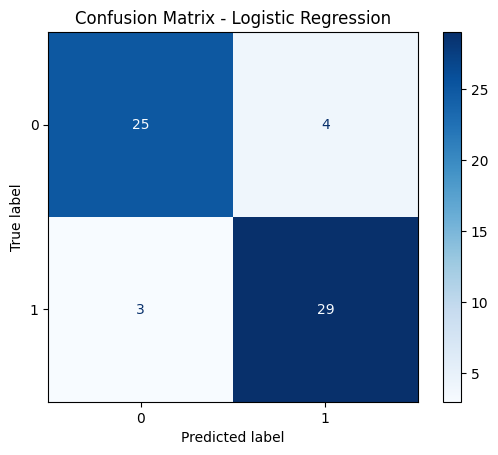

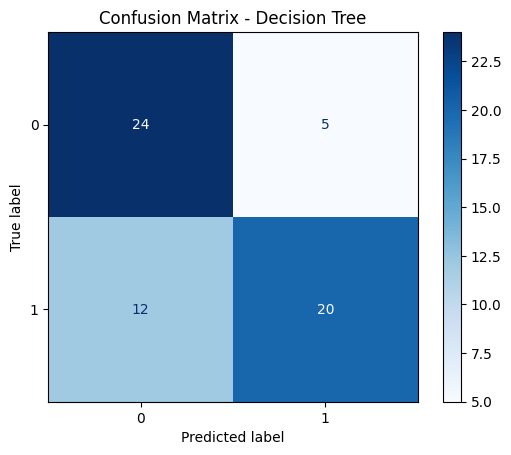

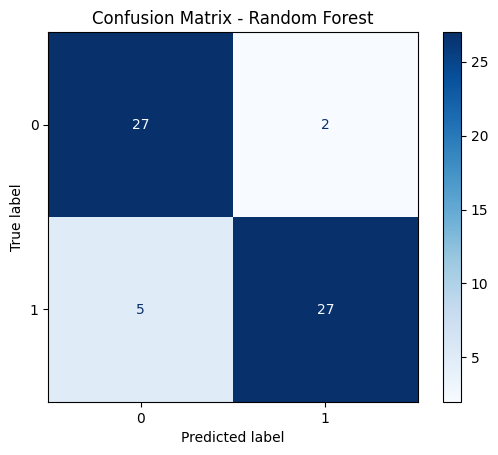

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.grid(False)
    plt.show()


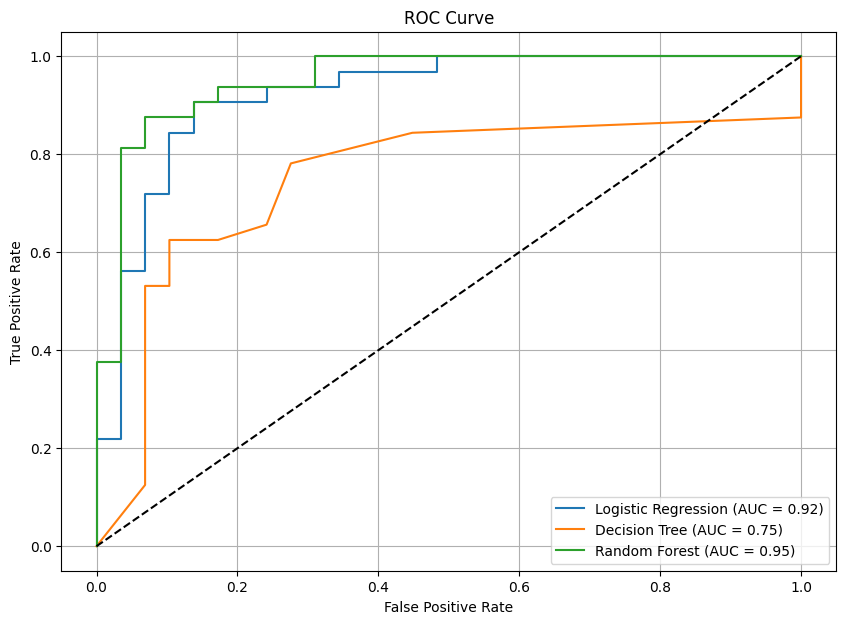

In [23]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 7))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# **Evaluate and Compare Model**

In [24]:
from sklearn.metrics import roc_auc_score

# Add ROC-AUC to the previous metrics
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



=== Logistic Regression ===
Accuracy: 0.8852459016393442
Precision: 0.8787878787878788
Recall: 0.90625
F1 Score: 0.8923076923076924
ROC AUC Score: 0.9224137931034482
Confusion Matrix:
 [[25  4]
 [ 3 29]]

=== Decision Tree ===
Accuracy: 0.7213114754098361
Precision: 0.8
Recall: 0.625
F1 Score: 0.7017543859649122
ROC AUC Score: 0.7489224137931034
Confusion Matrix:
 [[24  5]
 [12 20]]

=== Random Forest ===
Accuracy: 0.8852459016393442
Precision: 0.9310344827586207
Recall: 0.84375
F1 Score: 0.8852459016393442
ROC AUC Score: 0.9515086206896552
Confusion Matrix:
 [[27  2]
 [ 5 27]]
